# MOVIE RECOMMENDATION SYSTEM 

By: Payal Chatterjee

In [1]:
import numpy as np
import pandas as pd

**IMPORTING THE DATASET**

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv("/Users/payalchatterjee/Movie recommender/file.tsv",sep='\t', names=column_names)

In [3]:
movie_titles = pd.read_csv("/Users/payalchatterjee/Movie recommender/Movie_Id_Titles.csv")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


**CREATING THE DATAFRAME WITH THE REQUIRED COLUMNS**

In [4]:
movie_df= pd.merge(movie_titles,df,on='item_id')
movie_df.head(10)

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324
5,1,Toy Story (1995),5,4,875635748
6,1,Toy Story (1995),109,4,880563619
7,1,Toy Story (1995),181,3,878962392
8,1,Toy Story (1995),95,5,879197329
9,1,Toy Story (1995),268,3,875742341


**IMPORTING REQUIRED LIBRARIES FOR  VISUALIZATION OF DATA**

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ratings = pd.DataFrame(movie_df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(movie_df.groupby('title')['rating'].count())
ratings.head()

# CALCULATING NUMBER OF RATINGS FOR THE MOVIES

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: title={'center': 'Rating Graph'}, xlabel='User id', ylabel='Number of ratings'>

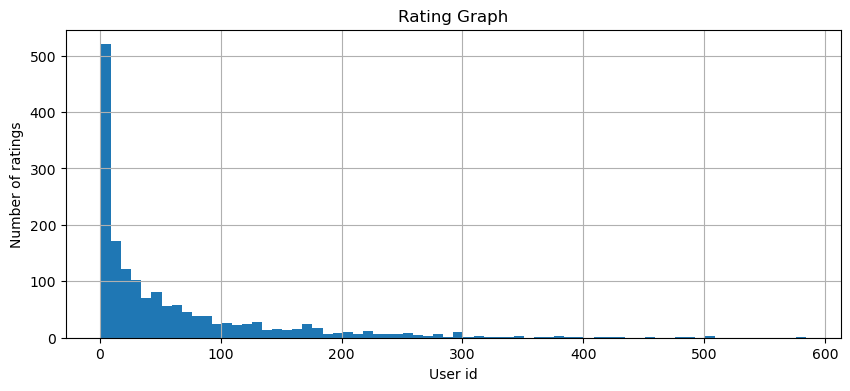

In [7]:
plt.figure(figsize=(10,4))

plt.xlabel("User id")
plt.ylabel("Number of ratings")
plt.title("Rating Graph")

ratings['num of ratings'].hist(bins=70)
#REPRESENTING THE NUMBER OF RATINGS IN VISUAL FORMAT

**CREATING THE PIVOT TABLE**

In [8]:
moviemat = movie_df.pivot_table(index='user_id',columns='title',values='rating')
moviemat.head(10)

##CONVERTING THE MOVIE DATAFRAME INTO A PIVOT TABLE FOR CORRELATION

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
moviemat = moviemat.dropna(thresh=10,axis=1).fillna(0)
moviemat.head(10)

title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0
6,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0
7,0.0,4.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,5.0,...,4.0,0.0,0.0,0.0,0.0,3.0,5.0,3.0,0.0,3.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**IMPORTING THE LIBRARIES FOR GUI (OF THE MOVIE RECOMMENDATION SYSTEM)**

In [10]:
from tkinter import *
import pandas as pd
import numpy as np
from tkinter import ttk,filedialog
from PIL import ImageTk, Image

In [11]:
## CREATING THE FUNCTION FOR FINDING THE CORRELATION BETWEEN MOVIES

def getmovie():
    movie_name=ent.get()
    user_movie= moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(user_movie)

    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie.sort_values('Correlation',ascending=False)
    corr_movie = corr_movie.join(ratings[['rating','num of ratings']])

    recommend=corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).head(11)
    recommend.drop('Correlation',inplace=True,axis=1)
    recommend= recommend.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')


In [20]:
def getmovie():
    movie_name=ent.get()
    user_movie= moviemat[movie_name]
    similar_to_movie = moviemat.corrwith(user_movie)

    corr_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    corr_movie.sort_values('Correlation',ascending=False)
    corr_movie = corr_movie.join(ratings[['rating','num of ratings']])

    recommend=corr_movie[corr_movie['num of ratings']>100].sort_values('Correlation',ascending=False).head(11)
    recommend.drop('Correlation',inplace=True,axis=1)
    recommend= recommend.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
    return recommend


root=Tk()  # MAIN WINDOW OF GUI
root.geometry("878x709")      #DIMENSIONS OF THE WINDOW
root.title("Movie Recommender")   #TITLE
#root.configure(bg='black')


try:
    # Load image and store a reference to prevent garbage collection
    bg = Image.open(r"/Users/payalchatterjee/Movie recommender/Image.jpg")
    photo = ImageTk.PhotoImage(bg)
    lab = Label(root, image=photo)
    lab.image = photo  # Keep a reference to prevent garbage collection
    lab.place(x=0, y=0, relwidth=1, relheight=1)
except Exception as e:
    print(f"Error loading image: {e}")


def disp_output():
    my_tree=ttk.Treeview(root) #CREATING A FRAME INSIDE ROOT WINDOW TO DISPLAY THE OUTPUT DATA
    my_tree.grid(row=5,column=0,columnspan=3,padx=80,pady=30) # PLACEMENT OF THE FRAME


    output = getmovie() #CALLING THE FUNCTION getmovie() TO RECEIVE THE FINAL OUTPUT DATA
    my_tree['column']= list(output.columns) # CONVERTING THE COLUMN NAMES OF THE OUTPUT DATA INTO LIST TO BE PRINTED
    my_tree['show']='headings'


    #clear_tree()

    #loop through column list
    for column in my_tree['column']:
        my_tree.heading(column,text= column)

    df_rows=output.values.tolist() #CONVERTING THE ROWS OF THE OUTPUT DATA INTO LIST AND PRINTING
    for rows in df_rows:     #LOOPING THROUGH THE ROWS AND PRINTING
        my_tree.insert("",'end',values=rows)


l1 = Label(root, text="Enter Movie name: ",font=("Times Roman",15))   # ASKING TO ENTER A MOVIE NAME
l1.grid(padx=10,pady=40) # POSITION OF THE LABEL
ent =Entry(root,width=60)    # TAKING INPUT FROM THE USER
#ent.grid(padx=30,pady=10)
l1.grid(row=0)
ent.grid(row=0,column=1,padx=10,pady=10) #POSITION THE THE ENTRY WINDOW


btn=Button(root, text="Search", bg="purple",height=2,width=9, fg="black",font=("Times Roman",11), command=disp_output)
btn.grid(row=0, column=4)   ##CREATING A SEARCH BUTTON, WHEN CLICKED SHOWS THE OUTPUT



root.mainloop()